# Casualty

# Exploratory data analysis (EDA)

In this section, we perform some exploratory data analysis on our dataframe to get a general idea of what our dataframe consists of and to manipulate.

In [42]:
# ignnore warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# linear algebra and data processing
import numpy as np
import pandas as pd
from dask.dataframe import from_pandas
from causalnex.structure import StructureModel
from causalnex.network import BayesianNetwork

from causalnex.plots import plot_structure

from causalnex.structure import StructureModel
sm = StructureModel()


#visualisations
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
#basic insight on our columns and understand their properties and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
df.shape

(569, 33)

 Dataset have 569 rows and 32 Columns 

In [9]:
df['diagnosis'].agg(['count', 'size', 'nunique'])

count      569
size       569
nunique      2
Name: diagnosis, dtype: int64

In [10]:
pd.value_counts(df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

Class distribution: 357 benign (not cancer), 212 malignant (cancer)

In [11]:
def count_plot(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=column,palette=["blue", "skyblue"])
    plt.xlabel(f'{column}', fontsize=17)
    plt.ylabel("Count", fontsize=17)
    plt.title(f'\nDistribution of {column}\n', size=18, fontweight='bold')
    plt.show()

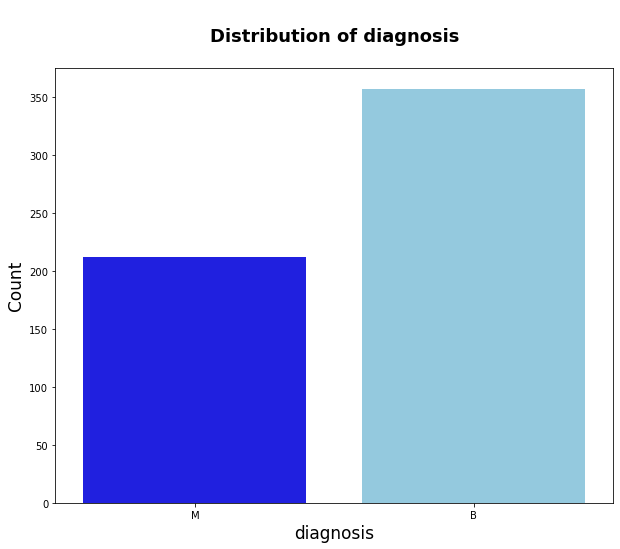

In [12]:
count_plot(df, "diagnosis")

In [13]:
#converting categorical coumns, into numerical by using one hot encoding 
for column in df.columns:
  if df[column].dtype == np.int64 or df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

<function matplotlib.pyplot.show(close=None, block=None)>

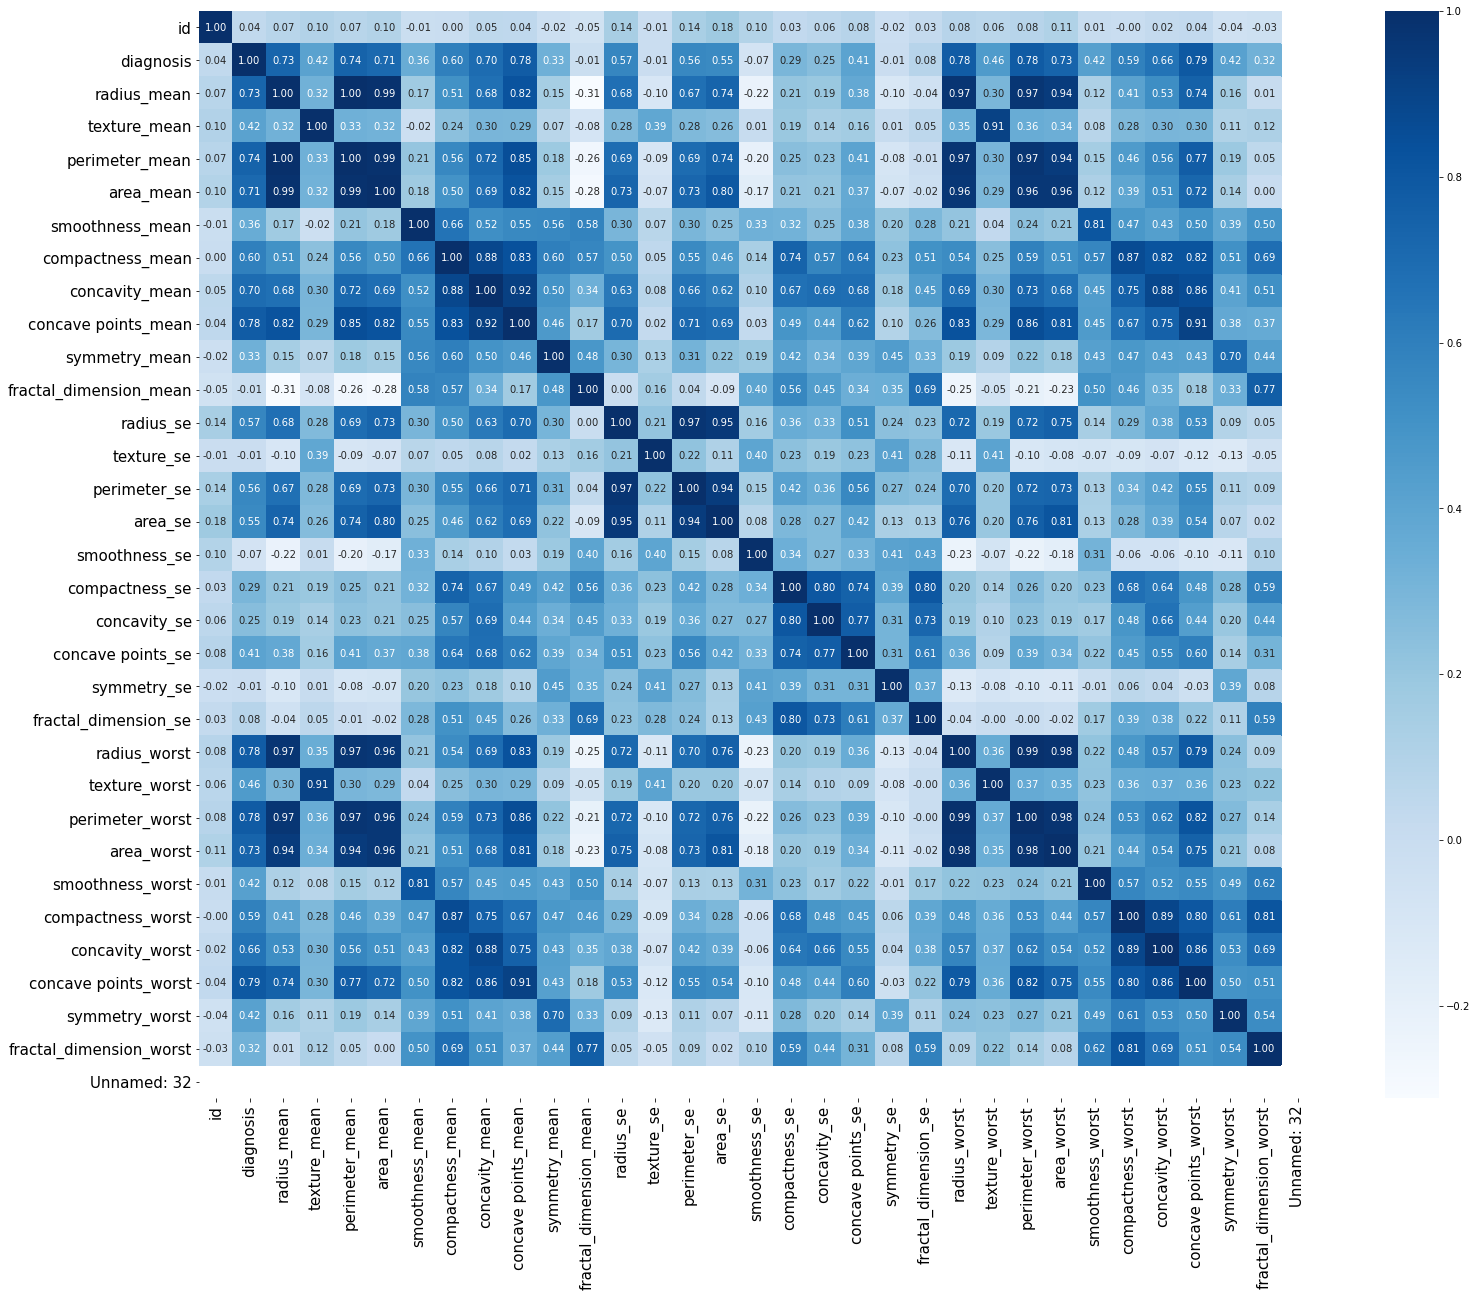

In [14]:
# heatmap to check for the highly correlated columns
plt.figure(figsize=(25, 20))
res=sns.heatmap(df.corr(), annot=True,cmap="Blues",fmt='.2f');
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.show

As we can observe from the heatmaps that there are many negative correlations in this dataset.
There are many attributes with correalation under less than 0.5.lets find the high correlated columns

In [15]:
high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['diagnosis'])>=0.5]

Text(0.5, 1.0, 'Heatmap of highly correlated columns\n')

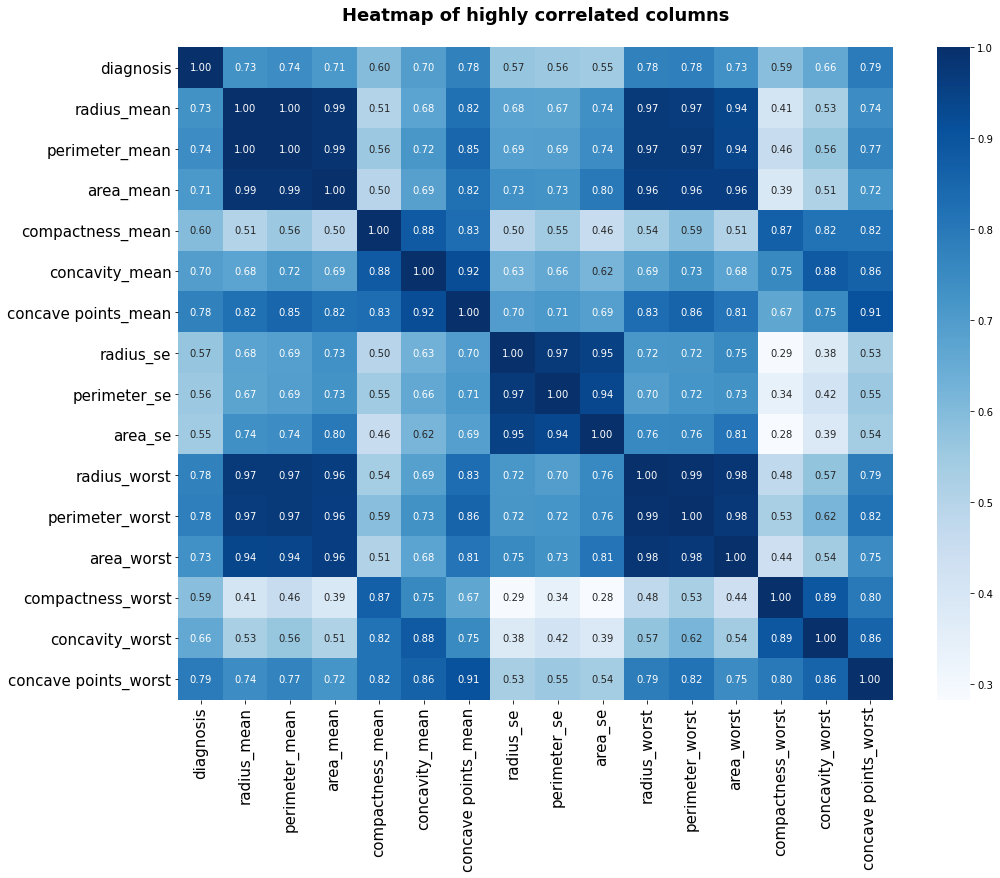

In [16]:
#heatmap of highly correlated columns
plt.figure(figsize=(16, 12))
res=sns.heatmap(df[high_corr_columns].corr(), annot=True,cmap="Blues",fmt='.2f');
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.title('Heatmap of highly correlated columns\n', size=18, fontweight='bold')



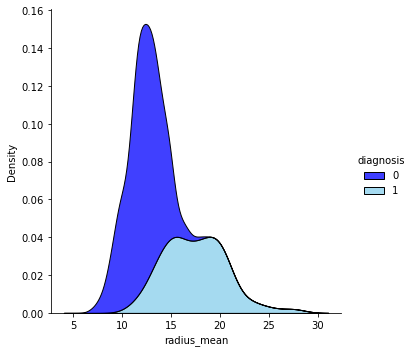

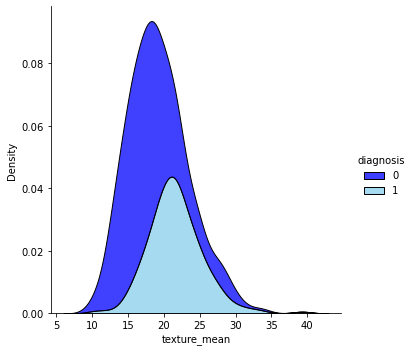

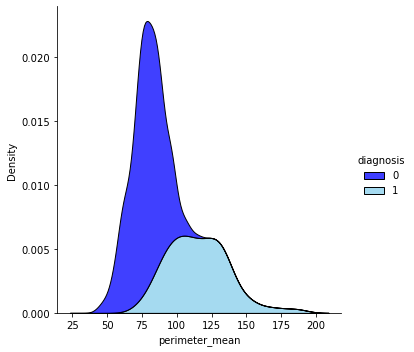

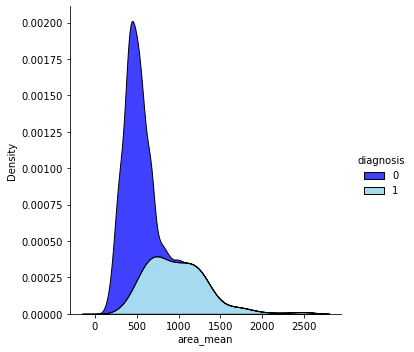

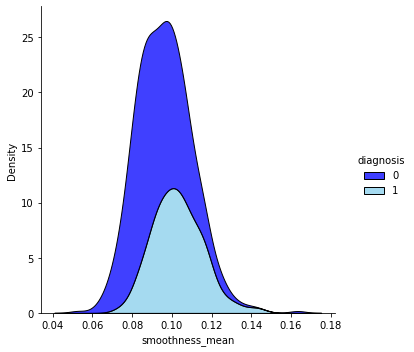

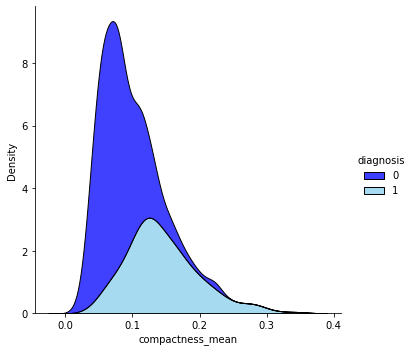

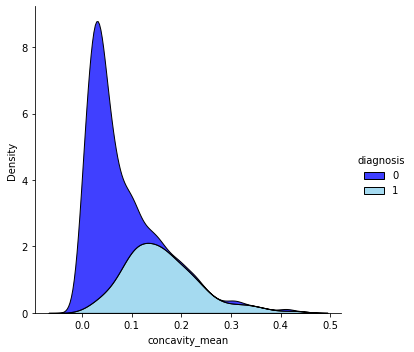

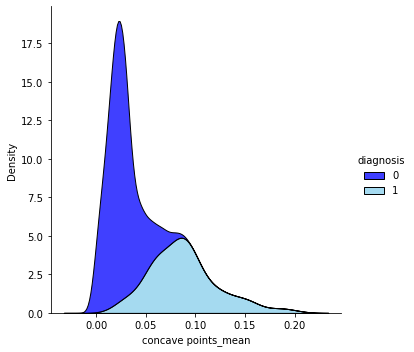

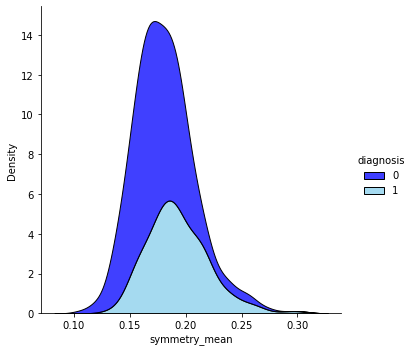

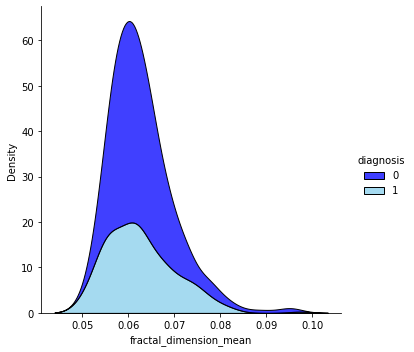

In [17]:
#difference between the mean values of attributes of the two types of cancer
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

for col in mean_col:
    sns.displot(df, x=col, hue="diagnosis", kind="kde", multiple="stack",palette=["blue", "skyblue"])

# Relationship Between Features & Diagnosis

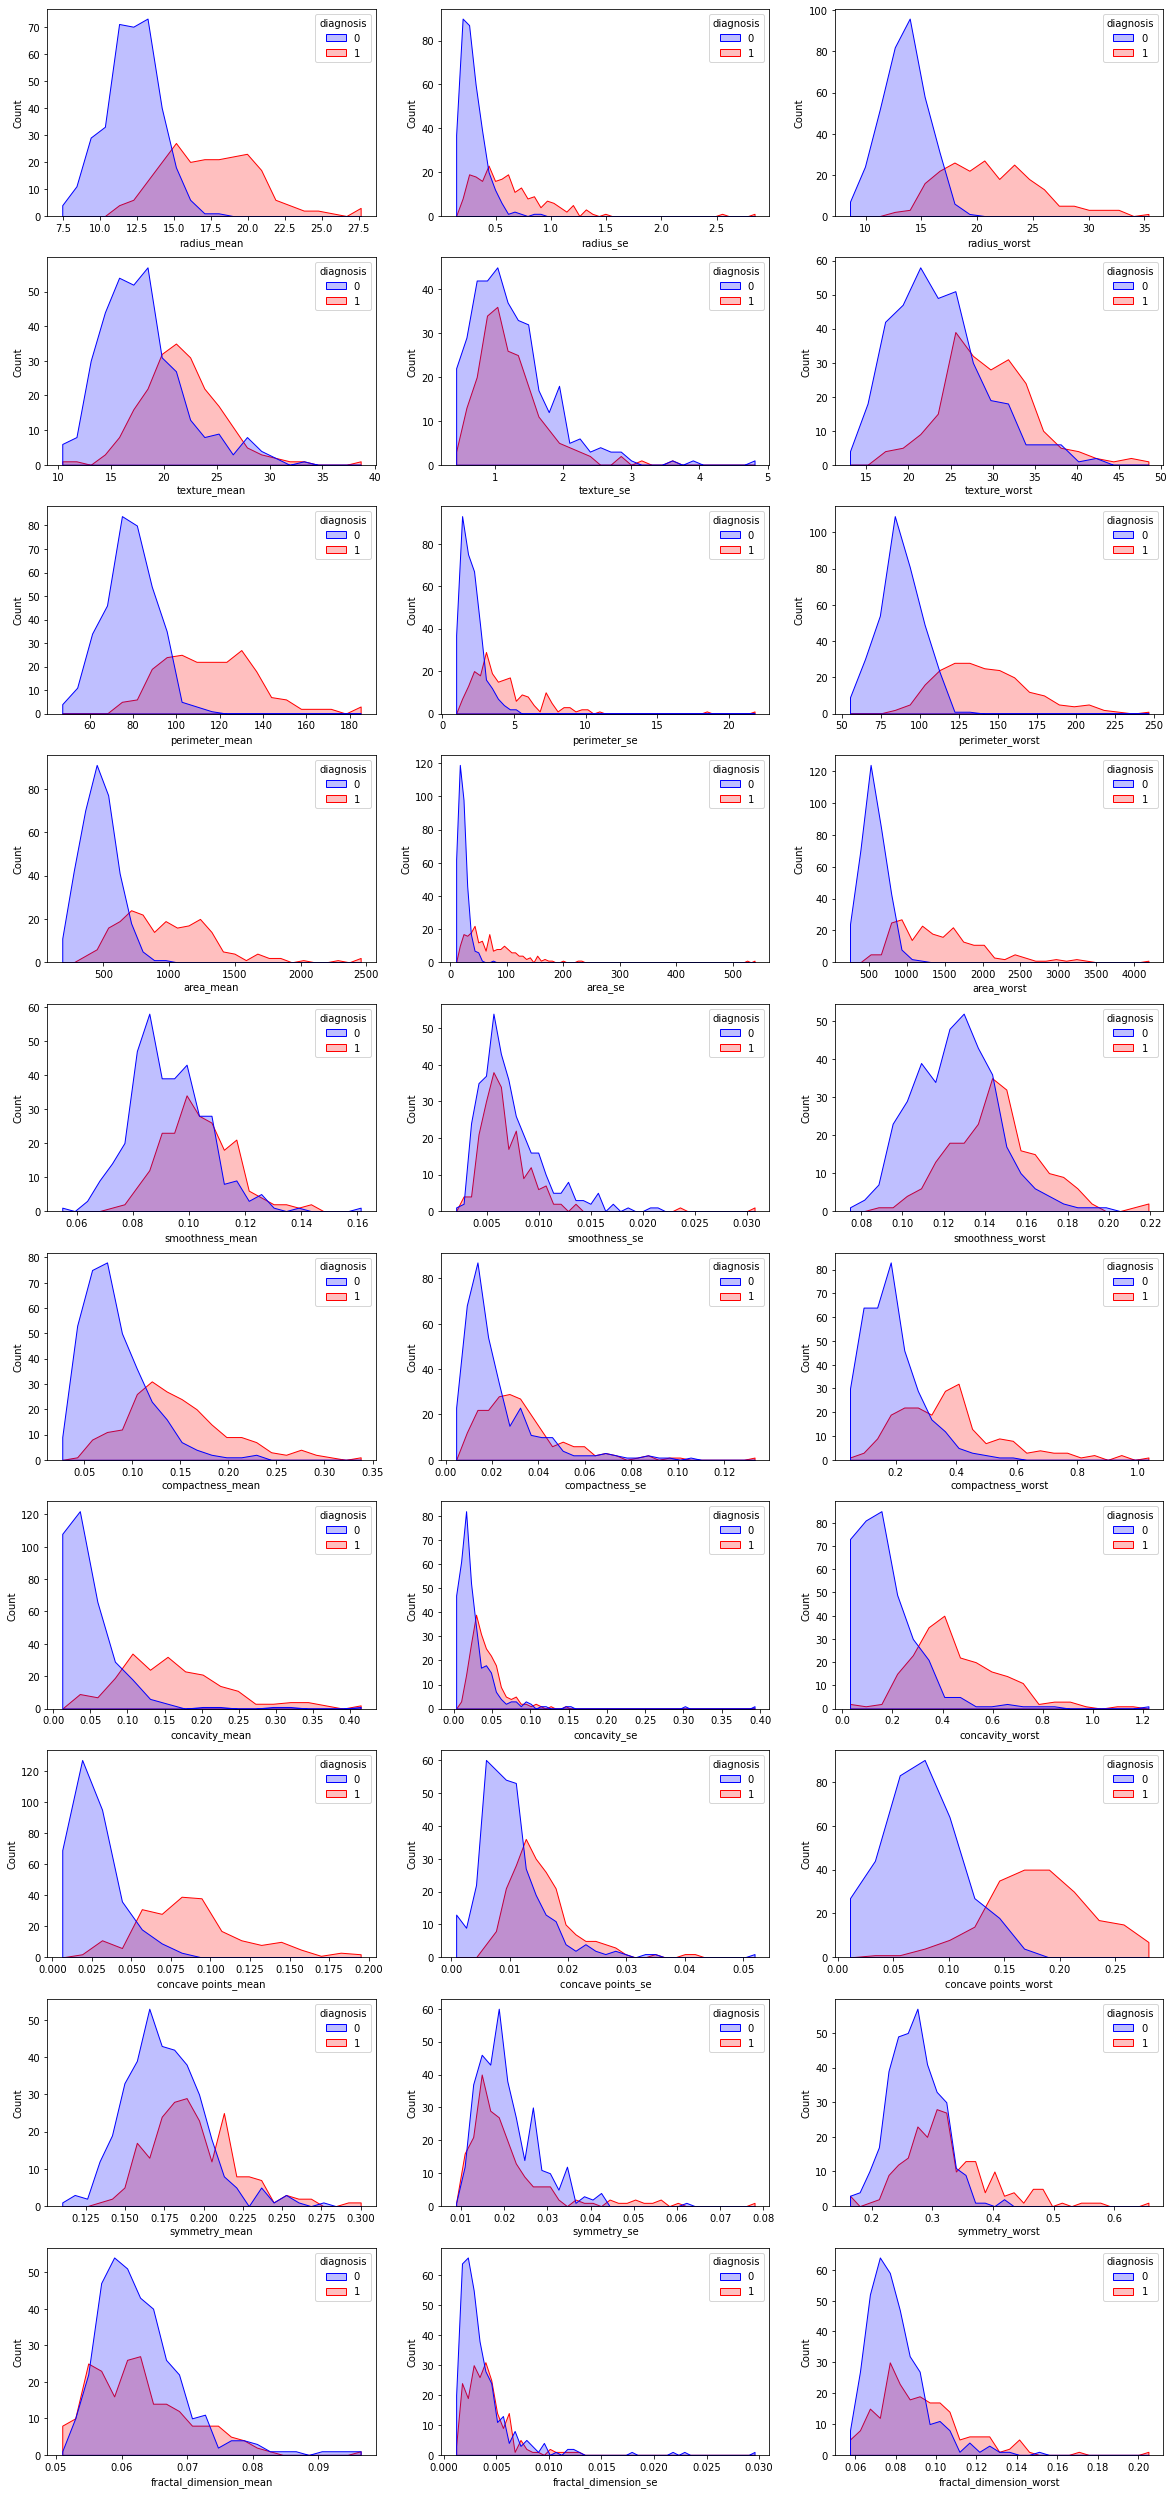

In [20]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"] 
fields = ["mean", "se", "worst"]
fig, axs = plt.subplots(10,3, figsize=(20,45))

for col in range(len(columns)):  
    for f in range(len(fields)):  
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["blue", "red"],
                     ax=axs[col][f])

# Exploring the Outliers in the Data

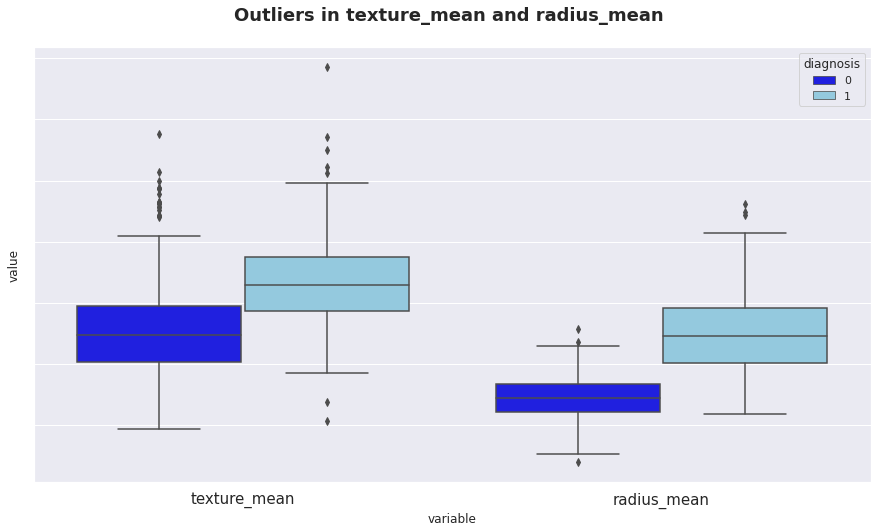

In [21]:
sns.set(style="darkgrid")
melted_data = pd.melt(df, id_vars='diagnosis', value_vars=['texture_mean', 'radius_mean',])
plt.figure(figsize=(15, 8))
res=sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data,palette=["blue", "skyblue"])
plt.title('Outliers in texture_mean and radius_mean \n', size=18, fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.show()

In [22]:
#transform outlier to the mean of each column
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
        df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()

In [23]:
drop_col = ['Unnamed: 32']
df = df.drop(columns=drop_col)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.088799,0.14710,...,25.38,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,...,24.99,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,...,23.57,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,84348301,1,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,...,14.91,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,...,22.54,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


In [24]:
import numpy as np
struct_data = df.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

[]


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.088799,0.14710,...,25.38,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,...,24.99,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,...,23.57,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,84348301,1,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,...,14.91,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,...,22.54,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


# Split the data and Scalling

In [34]:
X = struct_data.drop(["diagnosis"], axis=1)
y = struct_data["diagnosis"]

In [37]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# spliting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

In [43]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

In [44]:
# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# predicting on the test set
y_pred = classifier.predict(X_test)

In [46]:
cm=confusion_matrix(y_test, y_pred)
print ('Accuracy Score :',accuracy_score(y_test, y_pred))

Accuracy Score : 0.9736842105263158


Text(0.5, 12.5, 'Predicted')

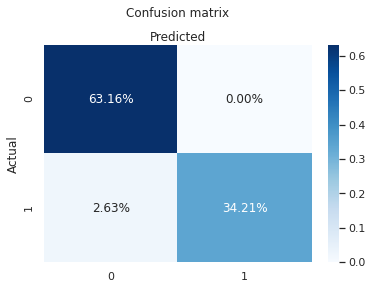

In [47]:
# create heatmap
ax=sns.heatmap(cm/np.sum(cm), annot=True ,fmt='.2%', cmap='Blues')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 1.0, 'Feature importance\n')

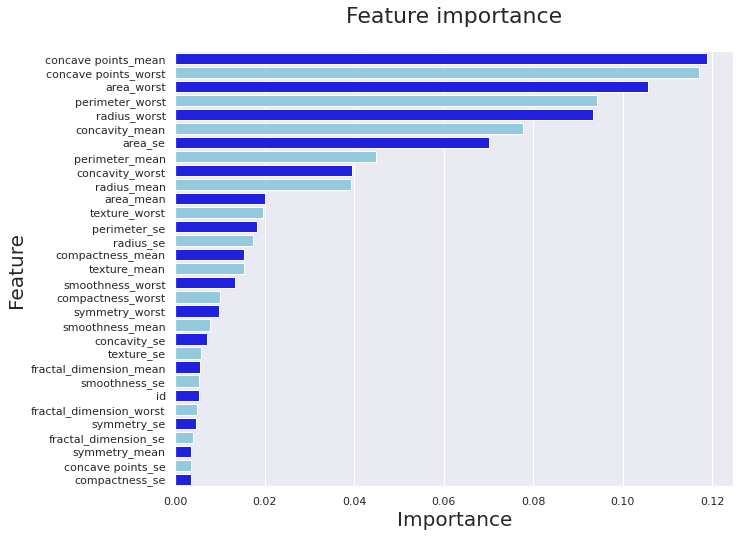

In [48]:
# get importance
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="importance", y="feature", data=feature_df,palette=["blue", "skyblue"])
ax.set_xlabel('Importance', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)  # ylabel
ax.set_title('Feature importance\n', fontsize=22)



# Build Causal Graph

In [50]:
causal_df = struct_data[['diagnosis','area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst'
                    ,'concave points_worst']].copy()
causal_df.head()

,diagnosis,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,1001.0,0.088799,0.14710,25.38,184.60,880.583128,0.7119,0.2654
1,1,1326.0,0.086900,0.07017,24.99,158.80,880.583128,0.2416,0.1860
2,1,1203.0,0.197400,0.12790,23.57,152.50,1709.000000,0.4504,0.2430
3,1,386.1,0.241400,0.10520,14.91,98.87,567.700000,0.6869,0.2575
4,1,1297.0,0.198000,0.10430,22.54,152.20,1575.000000,0.4000,0.1625


In [51]:
#create an empty structure model
from causalnex.structure import StructureModel
warnings.filterwarnings("ignore")
sm = StructureModel()

In [54]:
# Apply NOTEARS algorithm to learn the structure
from causalnex.structure.notears import from_pandas, from_pandas_lasso
sm = from_pandas(causal_df, w_threshold=0.8)

In [52]:
# from causalnex.structure.notears import from_pandas
# sm = from_pandas(struct_data)

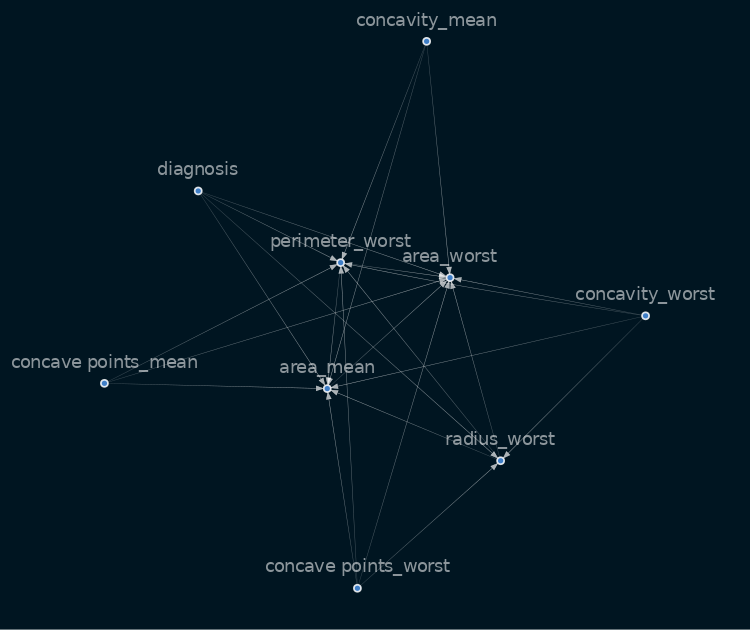

In [57]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image

viz = plot_structure(
    sm,
    graph_attributes={"scale": "2",'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [58]:
def jaccard_similarity_index(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)



In [59]:
def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

In [60]:
df_1 = causal_df.iloc[:150,:]
df_2 = causal_df.iloc[:300,:]
df_3 = causal_df.iloc[:450,:]
df_4 = causal_df.iloc[:,:] 

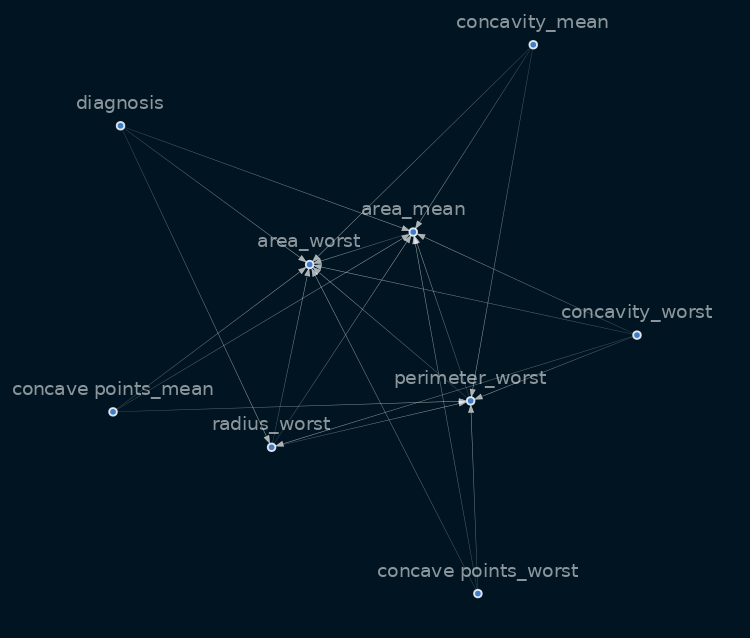

In [61]:
sm_df1 = from_pandas(df_1, w_threshold=0.8)
viz = plot_structure(
    sm_df1,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

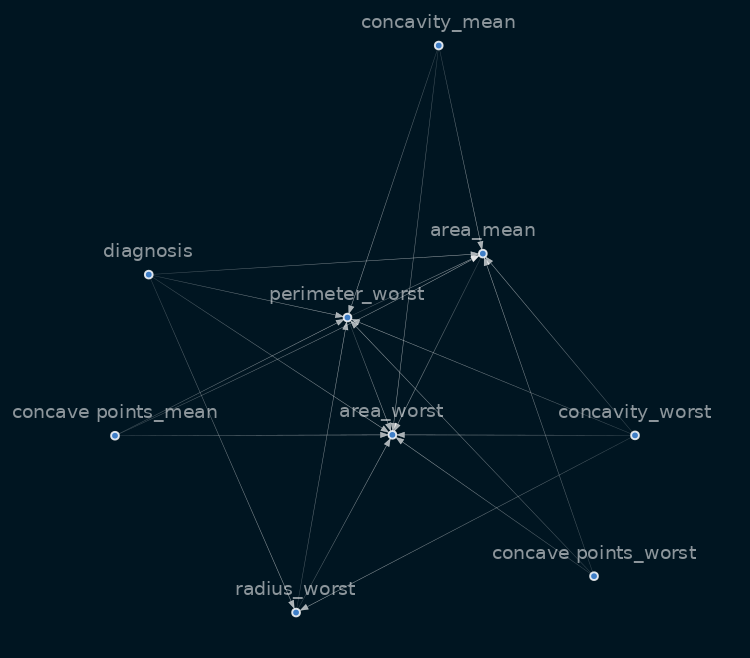

In [62]:
sm_df2 = from_pandas(df_2, w_threshold=0.8)
viz = plot_structure(
    sm_df2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [63]:
jaccard_similarity_index(sm_df1.edges(), sm_df2.edges())

0.913

In [64]:
Jaccar_score(sm_df1.edges(), sm_df2.edges())

0.9130434782608695

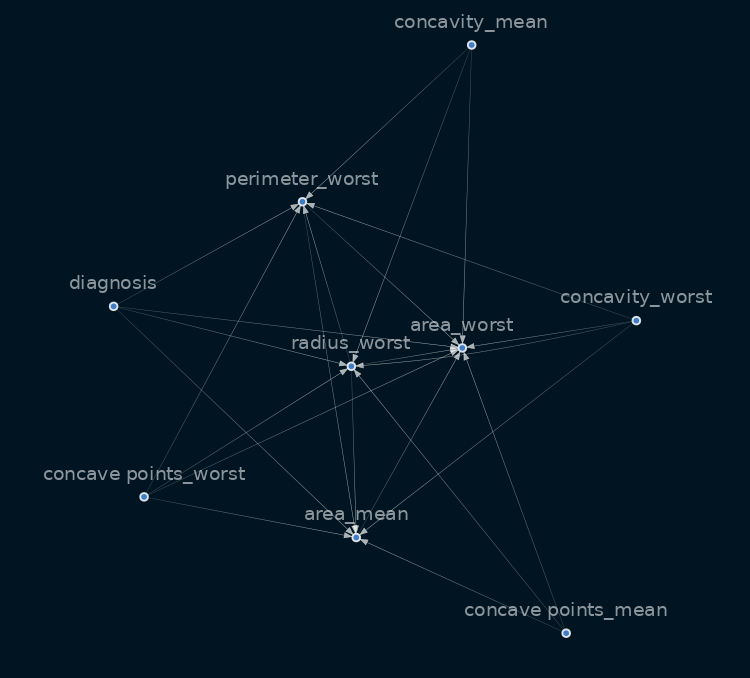

In [65]:
sm_df3 = from_pandas(df_3, w_threshold=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [66]:
jaccard_similarity_index(sm_df2.edges(), sm_df3.edges())

0.769

In [67]:
Jaccar_score(sm_df2.edges(), sm_df3.edges())

0.7692307692307693

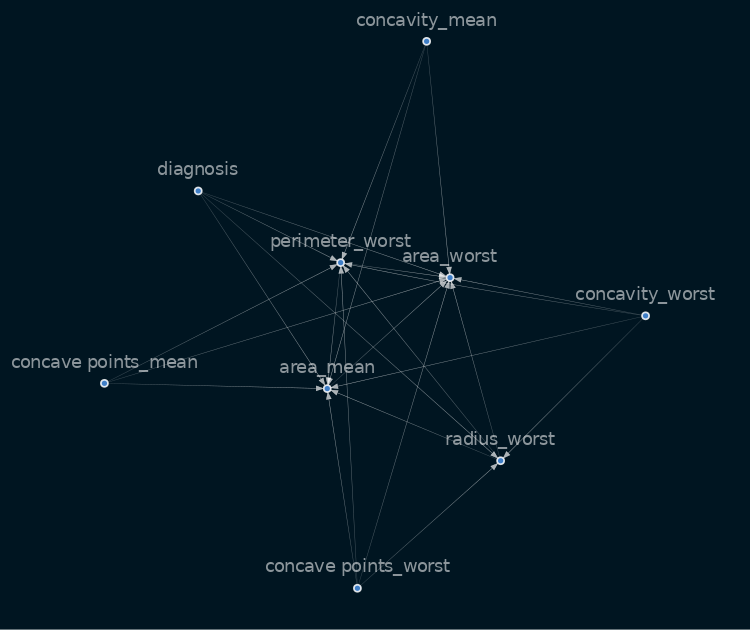

In [70]:
sm_df4 = from_pandas(df_4, w_threshold=0.8)
viz = plot_structure(
    sm_df4,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [71]:
jaccard_similarity_index(sm_df3.edges(), sm_df4.edges())

0.846

In [72]:
Jaccar_score(sm_df3.edges(), sm_df4.edges())

0.8461538461538461

In [73]:
sm.add_edge("concave_points_mean", "diagnosis")
sm.add_edge("concave_points_worst", "diagnosis")
sm.add_edge("concavity_mean", "diagnosis")
sm.add_edge("area_worst", "diagnosis")
sm.add_edge("area_mean", "diagnosis")
sm.add_edge("concavity_worst", "diagnosis")
sm.add_edge("perimeter_worst", "diagnosis")
sm.add_edge("radius_worst", "diagnosis")

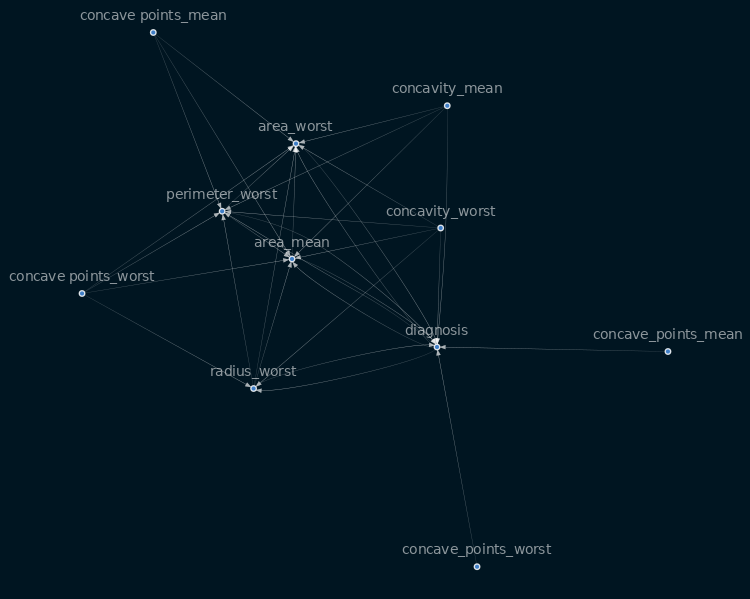

In [74]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [36]:
!pip install pygraphviz

In [27]:
import pygraphviz